In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# Q1 CIFAR
cifar10_data = ds.fetch_openml('CIFAR_10_small')
# Q2 MNIST
mnist = ds.fetch_openml('mnist_784')

NameError: name 'mnist' is not defined

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
def disp_img(first, last):
    images = []
    if first and last in range(cifar10_data['data'].shape[1]):
        for i in range(first, last+1):
            img_arr = cifar10_data['data'].iloc[i].tolist()
            img_arr = np.array(img_arr)
            # print(img_arr)

            img_arr = img_arr.reshape(3, 32, 32)
            img = np.transpose(img_arr, axes=[1,2,0])
            img = np.uint8(img)

            images.append(img)

    nrow = 5
    ncol = 6
    fig = plt.figure()
    for i in range(len(images)):
        fig.add_subplot(nrow, ncol, i+1)
        plt.imshow(images[i])

if __name__ == '__main__':
    disp_img(2, 20)

NameError: name 'cifar10_data' is not defined

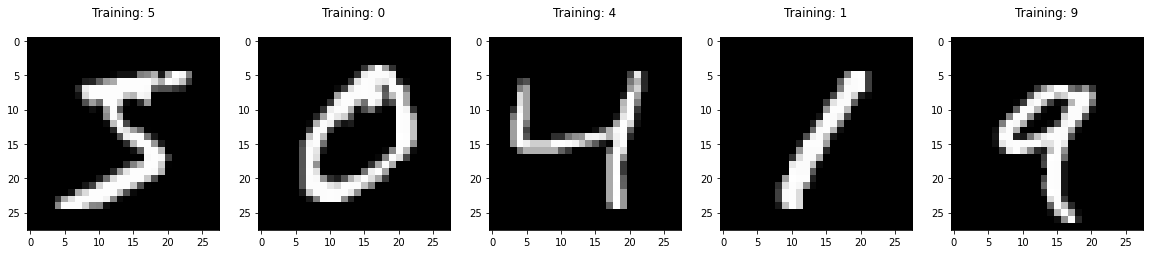

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.reshape(mnist.data.iloc[i].to_numpy(), (28, 28)), cmap=plt.cm.gray)
    plt.title('Training: ' + mnist.target.get(i) + '\n') 

# print(mnist.data[1:5])
# print(mnist.target[1:5])

# print(zip(mnist.data[1:5], mnist.target[1:5]))

# for index, (image, label) in enumerate(zip(mnist.data[1:5], mnist.target[1:5])):
#     plt.subplot(1, 5, index + 1)
    # print(image, label)
    # plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    # plt.title('Training: %i\n' % label, fontsize = 20)



In [3]:
# split data into train and test batch
num_train, num_test, num_lbl_train, num_lbl_test = train_test_split(mnist.data, mnist.target, test_size=0.25, random_state=0)

In [4]:
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=100,
                        C=1.0) # make instance of logistic reg model
clf.fit(num_train, num_lbl_train)  # train model

# Returns a NumPy Array
# Predict for One Observation (image)
# logisticRegr.predict(X_test[0].reshape(1,-1))

/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

['0']


Text(0.5, 1.0, 'Training: 0\n')

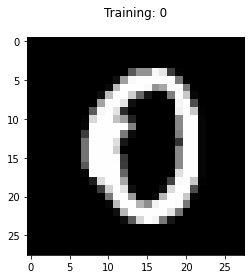

In [5]:
pred0 = clf.predict(np.array(num_test.iloc[0]).reshape(1,-1))
print(pred0)

fig = plt.figure()
plt.imshow(np.reshape(num_test.iloc[0].to_numpy(), (28, 28)), cmap=plt.cm.gray)
plt.title('Training: ' + num_lbl_test.iloc[0] + '\n') 

It works!!
Now predict the entire y_test

(52500, 784)
['0' '4' '1' ... '5' '9' '2']


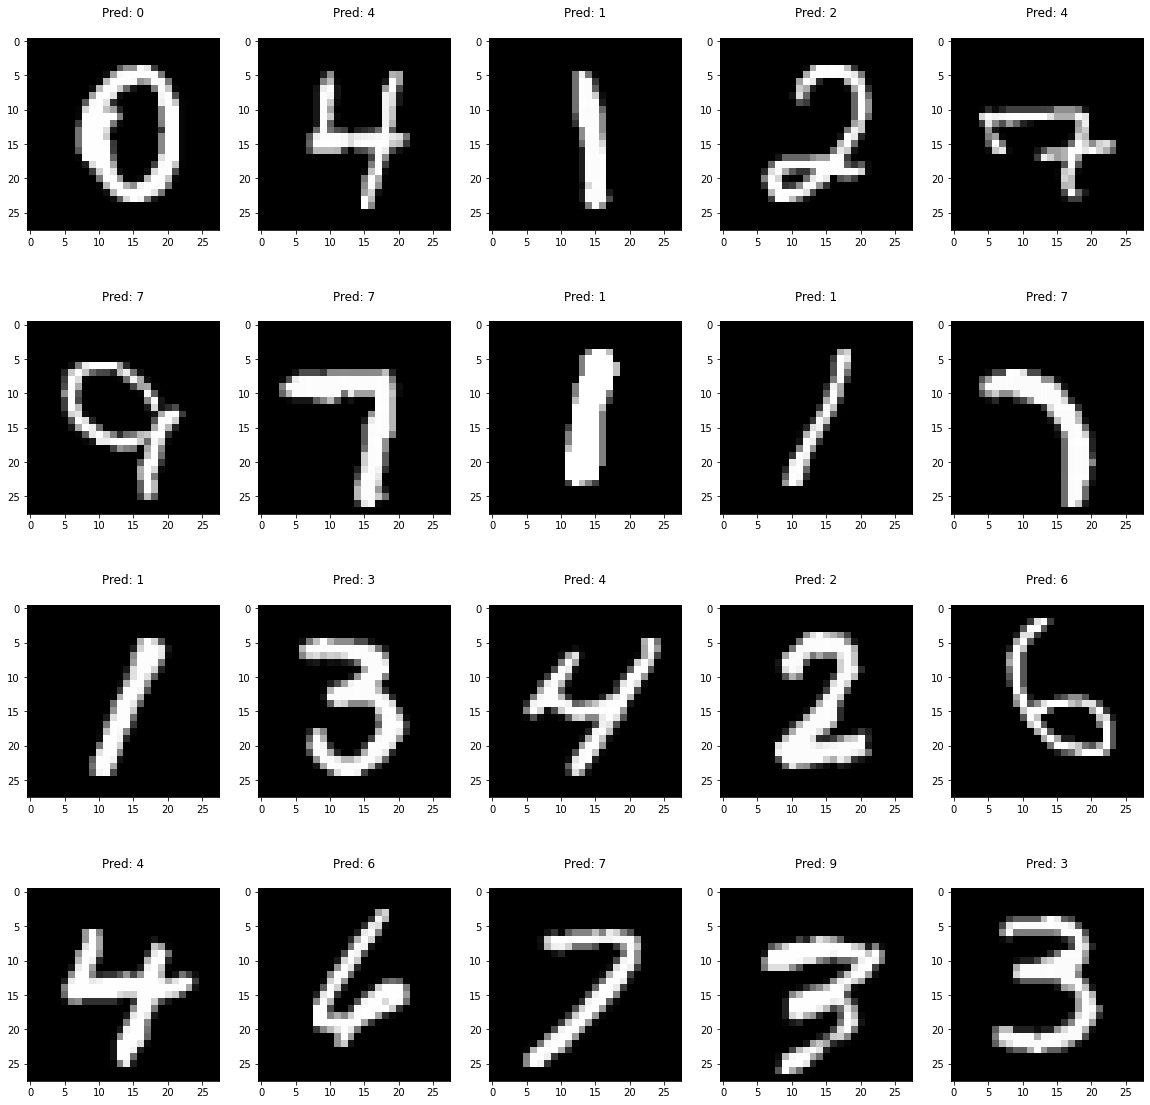

In [6]:
print(num_train.shape)
y_pred = clf.predict(num_test)
print(y_pred)

fig = plt.figure(figsize=(20, 20))
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    plt.imshow(np.reshape(num_test.iloc[i].to_numpy(), (28, 28)), cmap=plt.cm.gray)
    plt.title('Pred: ' + y_pred[i] + '\n')

In [7]:
# score
score = clf.score(num_test, num_lbl_test)
print(score)

0.9158285714285714


In [8]:
# try with L1 regulizer
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #ridge regression
                        solver='saga',
                        max_iter=100,
                        C=1.0) # make instance of logistic reg model
clf2.fit(num_train, num_lbl_train)  # train model


/home/tom/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='l1', solver='saga')

['0' '4' '1' ... '5' '9' '2']
0.9160571428571429


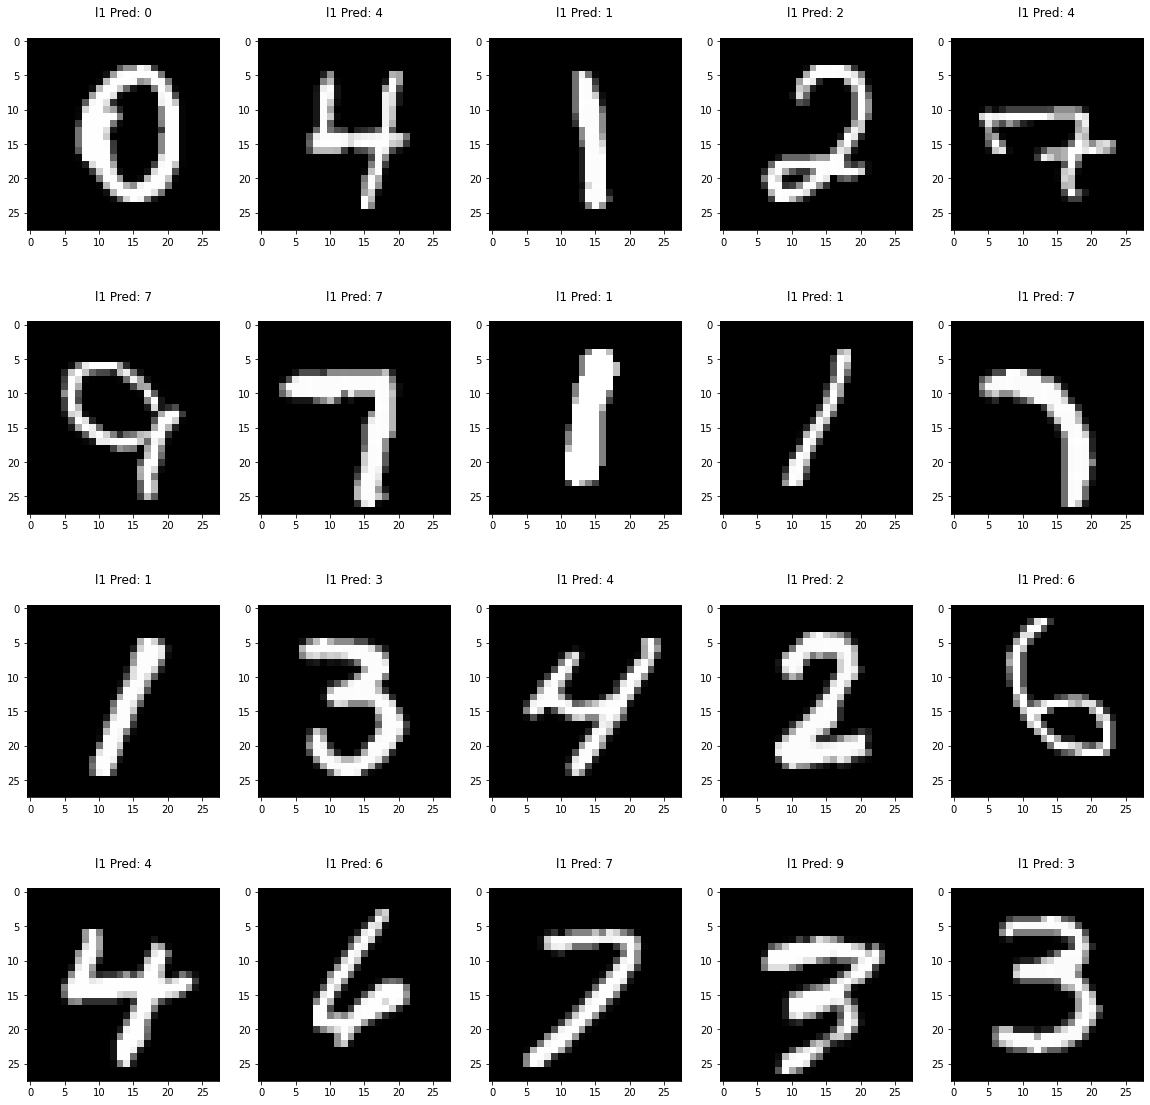

In [9]:
# predict
y_pred2 = clf2.predict(num_test)
print(y_pred2)

fig = plt.figure(figsize=(20, 20))
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    plt.imshow(np.reshape(num_test.iloc[i].to_numpy(), (28, 28)), cmap=plt.cm.gray)
    plt.title('l1 Pred: ' + y_pred2[i] + '\n')
    
# l1 prediction score
score = clf2.score(num_test, num_lbl_test)
print(score)

(10, 784)
(784,)


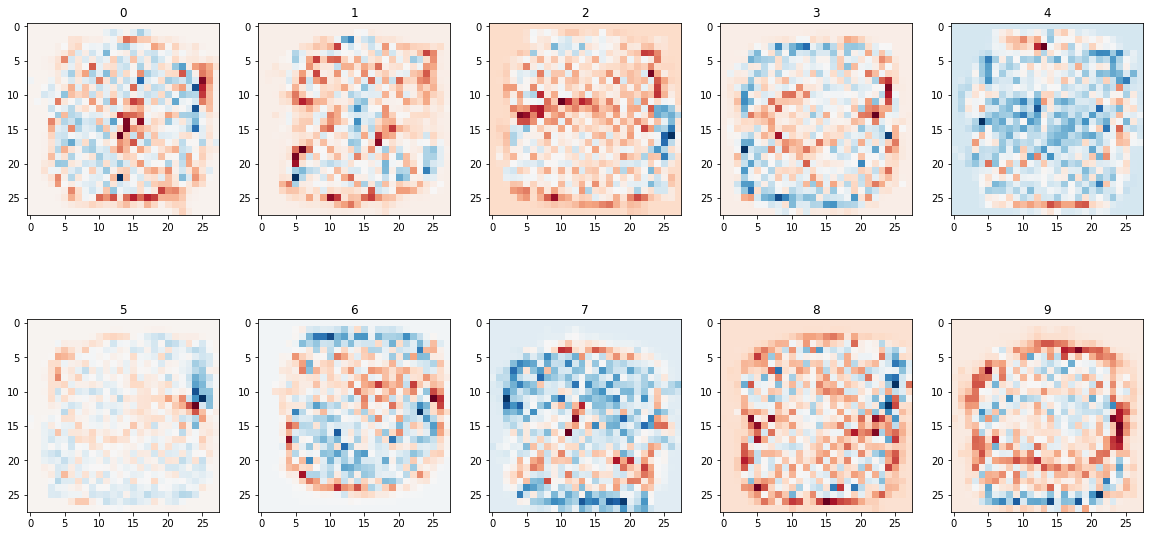

In [22]:
print(clf2.coef_.shape)
print(clf.coef_[0].shape)

fig = plt.figure(figsize=(20,10))
for i in range(clf.coef_.shape[0]):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(np.reshape(clf.coef_[i], (28, 28)), cmap=plt.cm.RdBu)
    plt.title('%i'% i)

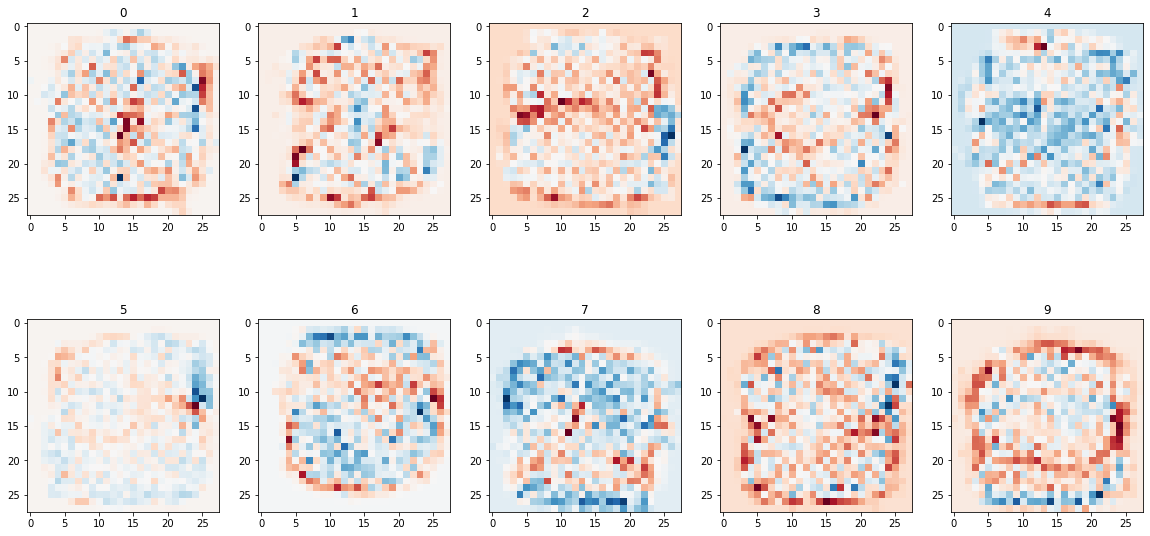

In [19]:
fig = plt.figure(figsize=(20,10))
for i in range(clf2.coef_.shape[0]):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(np.reshape(clf2.coef_[i], (28, 28)), cmap=plt.cm.RdBu)
    plt.title('%i'% i)

In [8]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(num_train,num_lbl_train)

RandomForestClassifier()

In [10]:
pred=rf.predict(num_test)
print ("Classification Report")
print(classification_report(num_lbl_test, pred))
print ("Confusion Report")
print(confusion_matrix(num_lbl_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1387
           1       0.98      0.99      0.99      1580
           2       0.95      0.97      0.96      1443
           3       0.97      0.95      0.96      1435
           4       0.97      0.97      0.97      1350
           5       0.96      0.96      0.96      1231
           6       0.98      0.98      0.98      1387
           7       0.97      0.96      0.96      1458
           8       0.96      0.96      0.96      1368
           9       0.95      0.94      0.95      1361

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Report
[[1368    0    2    1    2    2    6    0    6    0]
 [   0 1562    7    1    3    1    2    1    2    1]
 [   4    2 1402    5    5    2    3    9    9    2]
 [   1    2   22 1359    0   17    1   12  

In [12]:
#Cross validation
rf=RandomForestClassifier(n_estimators=100)
rf.fit(mnist.data, mnist.target)
score = cross_val_score(rf, mnist.data, mnist.target)
print (np.mean(score))

0.9676714285714285


In [15]:
#Predicting on test data
pred=rf.predict(num_test)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)

In [16]:
param_list = [("eta", 0.08), ("max_depth", 6), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 200
early_stopping = 30
    
d_train = xgb.DMatrix(num_train, label=num_lbl_train)
d_val = xgb.DMatrix(num_test, label=num_lbl_test)
eval_list = [(d_train, "train"), (d_val, "validation")]
bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

#make prediction on dataset
d_test = xgb.DMatrix(data=num_test)
y_pred = bst.predict(d_test)

(56000, 784)
(14000, 784)
